## *instats* Workshop, November 18-22, 2024 
### https://instats.org/seminar/computational-network-science-using-pyth2

# COMPUTATIONAL NETWORK SCIENCE USING PYTHON
## Moses Boudourides

# II. BIPARTITE PROJECTIONS

<span style="color:green">

### [1. The Bipartite Graph of Southern Women](#1)
    
- ### [1a. Binary Projections](#1a)
    
- ### [1b. Weighted Projections](#1b) 
    
- ### [1c. Newman's Weighted Projections](#1c) 
    
- ### [1d. Overlap Weighted Projections](#1d) 
    
### [2. A Random Weighted Bipartite Graph](#2)
    
- ### [2a. Binary Projections](#2a)
    
- ### [2b. Weighted Projections](#2b) 
    
</span>

In [1]:
# The modules (libraries) of Python which are used in this notebook:

import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms.bipartite.matrix import biadjacency_matrix
import matplotlib.pyplot as plt
import matplotlib.colors
from collections import Counter
import random
import math
import pickle
import numpy as np
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image, display 

In [2]:
def gne(G,name):
    if G.is_directed()==True:
        print("The %s graph is a directed graph." %name)
    else:
        print("The %s graph is an undirected graph." %name) 
    if nx.is_bipartite(G)==True:
        print("The %s is a bipartite graph." %name)
    if nx.is_weighted(G)==True:
        print("The %s graph is a weighted graph." %name)
    if G.is_multigraph()==True:
        print("The %s graph is a multigraph." %name)
    if nx.is_tree(G)==True:
        print("The %s graph is a tree." %name)
    nodes=sorted(G.nodes())
    if set([type(n) for n in G.nodes()])=={str}:
        sn=", ".join(nodes)
    else:
        sn=", ".join([str(n) for n in G.nodes()])
    if nx.is_weighted(G)==False:
        edges=sorted(G.edges())
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+")" for x in edges])
    else:
        edges=sorted(G.edges(data=True))
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+", weight="+str(x[2]['weight'])+")" for x in edges])
    if not nx.is_bipartite(G):
        print("The %s graph has %i nodes and %i edges.\nThe nodes are:\n %s.\nThe edges are:\n %s." %(name,len(nodes),len(edges),sn,se))
    else: 
        X, Y = bipartite.sets(G)
        print(f"The {name} graph has {len(nodes)} nodes and len(edges) edges.\n{len(X)} nodes are in the first set of the bipartition:\n {sorted(X)}.\n{len(Y)} nodes are in the second set of the bipartition:\n {sorted(Y)}.\nThe edges are:\n {se}.")
        
def gne_s(G,name):
    if G.is_directed()==True:
        print("The %s graph is a directed graph." %name)
    else:
        print("The %s graph is an undirected graph." %name) 
    if nx.is_bipartite(G)==True:
        print("The %s is a bipartite graph." %name)
    if nx.is_weighted(G)==True:
        print("The %s graph is a weighted graph." %name)
    if G.is_multigraph()==True:
        print("The %s graph is a multigraph." %name)
    if nx.is_tree(G)==True:
        print("The %s graph is a tree." %name)
    nodes=sorted(G.nodes())
    if set([type(n) for n in G.nodes()])=={str}:
        sn=", ".join(nodes)
    else:
        sn=", ".join([str(n) for n in G.nodes()])
    if nx.is_weighted(G)==False:
        edges=sorted(G.edges())
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+")" for x in edges])
    else:
        edges=sorted(G.edges(data=True))
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+", weight="+str(x[2]['weight'])+")" for x in edges])
    if not nx.is_bipartite(G):
        print("The %s graph has %i nodes and %i edges.\nThe nodes are:\n %s." %(name,len(nodes),len(edges),sn))
    else: 
        X, Y = bipartite.sets(G)
        print(f"The {name} graph has {len(nodes)} nodes and len(edges) edges.\n{len(X)} nodes are in the first set of the bipartition:\n {sorted(X)}.\n{len(Y)} nodes are in the second set of the bipartition:\n {sorted(Y)}.")
        
def edge_type(G,name):
    gne_s(G,name)
    if not nx.is_weighted(G):
        if len(list(G.edges(data=True))[0][2])>0:
            weight_key = list(list(G.edges(data=True))[0][2].keys())[0]
            weight_value = list(list(G.edges(data=True))[0][2].values())[0]
            try:
                float(weight_value)
                print(f"Weighted graph with weight attribute '{weight_key}'.")
            except ValueError:
                print(f"Labeled graph with label attribute '{weight_key}'.")
        else:
            print("This graph has no edge attributes.")
    else:
        weight_key = list(next(iter(G.edges(data=True)))[2].keys())[0]
        print(f"Weighted graph with weight attribute '{weight_key}'.")

### **Biadjacency Matrix**

The **biadjacency matrix** $B$ of a bipartite graph $G = (U, V, E)$, where $U$ and $V$ are the two disjoint sets of nodes and $E \subseteq U \times V$ is the set of edges, is defined as follows:

- $B$ is a $|U| \times |V|$ matrix where:
<br>
  $$
  B_{ij} = 
  \begin{cases} 
  w_{ij}, & \text{if there is an edge between } u_i \in U \text{ and } v_j \in V \text{ with weight } w_{ij}, \\
  0, & \text{otherwise}.
  \end{cases}
  $$
  <br>
- If $G$ is a simple bipartite graph, $w_{ij} = 1$ for all $(u_i, v_j) \in E$.

---

### **Unipartite Projections**

Unipartite projections of a bipartite graph map the original graph into a graph defined on only one of the two node sets ($U$ or $V$). These projections are based on the relationships established through the other set.

#### **Types of Unipartite Projections**

1. **Binary Projections:**

For simple bipartite graphs, the binary projections should result in binary adjacency matrices. To achieve this, we use a binarization function $\text{bin}(X)$, defined as:
<br>
$$
\text{bin}(X)_{ij} = 
\begin{cases} 
1, & \text{if } X_{ij} > 0, \\
0, & \text{otherwise}.
\end{cases}
$$
<br>
Using this definition, the adjacency matrices for the binary projections are:

   - **Definition:** The binary projection of a simple bipartite graph results in a unipartite graph where an edge exists between two nodes of one set if they are both connected to at least one common node in the other set.
   - **Adjacency Matrix for $U$ Projection:** $A_U = \text{bin}(B B^\top)$.
     - $(A_U)_{ij} = 1$ if $u_i$ and $u_j$ share at least one common neighbor in $V$.
   - **Adjacency Matrix for $V$ Projection:** $A_V = \text{bin}(B^\top B)$.
     - $(A_V)_{ij} = 1$ if $v_i$ and $v_j$ share at least one common neighbor in $U$.
<p>
    
2. **Weighted Projections:**
    
   - **Definition:** The weighted projection of a simple or a weighted bipartite graph includes edge weights that represent the number of shared neighbors or the cumulative weights of the connections.
   - **Adjacency Matrix for $U$ Projection:** $A_U = B B^\top$, where:
     <br>
     $$
     (A_U)_{ij} = \sum_{k} B_{ik} B_{jk},
     $$
     <br>
     representing the sum of shared edge weights for $u_i$ and $u_j$ through nodes in $V$.
   - **Adjacency Matrix for $V$ Projection:** $A_V = B^\top B$, where:
     <br>
     $$
     (A_V)_{ij} = \sum_{k} B_{ki} B_{kj},
     $$
     <br>
     representing the sum of shared edge weights for $v_i$ and $v_j$ through nodes in $U$.
<p>
    
3. **Normalized Weighted Projections:**
    
   - **Definition:** Edge weights are normalized to account for the total number of connections of the nodes involved, often to mitigate the influence of high-degree nodes.
   - **Normalized $U$ Projection:**
     <br>
     $$
     (A_U)_{ij} = \frac{\sum_{k} B_{ik} B_{jk}}{\sqrt{d_i d_j}},
     $$
     <br>
     where $d_i = \sum_{k} B_{ik}$ is the degree of $u_i$.
   - **Normalized $V$ Projection:**
     <br>
     $$
     (A_V)_{ij} = \frac{\sum_{k} B_{ki} B_{kj}}{\sqrt{d_i d_j}},
     $$
     <br>
     where $d_i = \sum_{k} B_{ki}$ is the degree of $v_i$.
<p>
    
4. **Newman's Weighted Projections:**
    
   - **Definition:** The Newman's weighted projection of a simple bipartite graph assigns edge weights using Newman’s collaboration model (Scientific collaboration networks: II. Shortest paths, weighted networks, and centrality, M. E. J. Newman, Phys. Rev. E 64, 016132 (2001)).
    - **Weights for $U$ Projection:** 
     <br>
     $$
     w_{i,j} = \sum_k \frac{B_{ik} B_{jk}}{d_k - 1},
     $$
    <br>
    where $u_i, u_j \in U, v_k \in V$ and $d_k$ is the degree of $v_k$.
    - **Weights for $V$ Projection:** 
     <br>
     $$
     w_{i,j} = \sum_k \frac{B_{ik} B_{jk}}{d_k - 1},
     $$
    <br>
    where $v_i, v_j \in V, u_k \in U$ and $d_k$ is the degree of $u_k$.
<p>
    
5. **Overlap Weighted Projections:** The overlap weighted projection is the projection of a simple bipartite graph using weights representing the Jaccard index between the neighborhoods of the two nodes (Borgatti, S.P. and Halgin, D. Analyzing Affiliation Networks. In Carrington, P. and Scott, J. (eds) The Sage Handbook of Social Network Analysis (2014)).
    - **Weights for $U$ Projection:**
    <br>
     $$
     w_{i,j} =  \frac{|N(u_i) \cap N(u_j)|}{|N(u_i) \cup N(u_j)|}  {\mbox{ or }} w_{i,j} =  \frac{|N(u_i) \cap N(u_j)|}{\min(|N(u_i)|, |N(u_j)|)},
     $$
    <br>
    where $u_i, u_j \in U$ and $N(v_i), N(v_j) \subset V$.
    - **Weights for $V$ Projection:**
    <br>
     $$
     w_{i,j} =  \frac{|N(v_i) \cap N(v_j)|}{|N(v_i) \cup N(v_j)|}   {\mbox{ or }} w_{i,j} =  \frac{|N(v_i) \cap N(v_j)|}{\min(|N(v_i)|, |N(v_j)|)},
     $$
    <br>
    where $v_i, v_j \in V$ and $N(v_i), N(v_j) \subset U$.

<a id='1'></a>
## <span style="color:green">1. The Bipartite Graph of Southern Women</span>

The Southern women graph is an undirected graph.
The Southern women is a bipartite graph.
The Southern women graph has 32 nodes and len(edges) edges.
18 nodes are in the first set of the bipartition:
 ['Brenda Rogers', 'Charlotte McDowd', 'Dorothy Murchison', 'Eleanor Nye', 'Evelyn Jefferson', 'Flora Price', 'Frances Anderson', 'Helen Lloyd', 'Katherina Rogers', 'Laura Mandeville', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Ruth DeSand', 'Sylvia Avondale', 'Theresa Anderson', 'Verne Sanderson'].
14 nodes are in the second set of the bipartition:
 ['E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'].
This graph has no edge attributes.


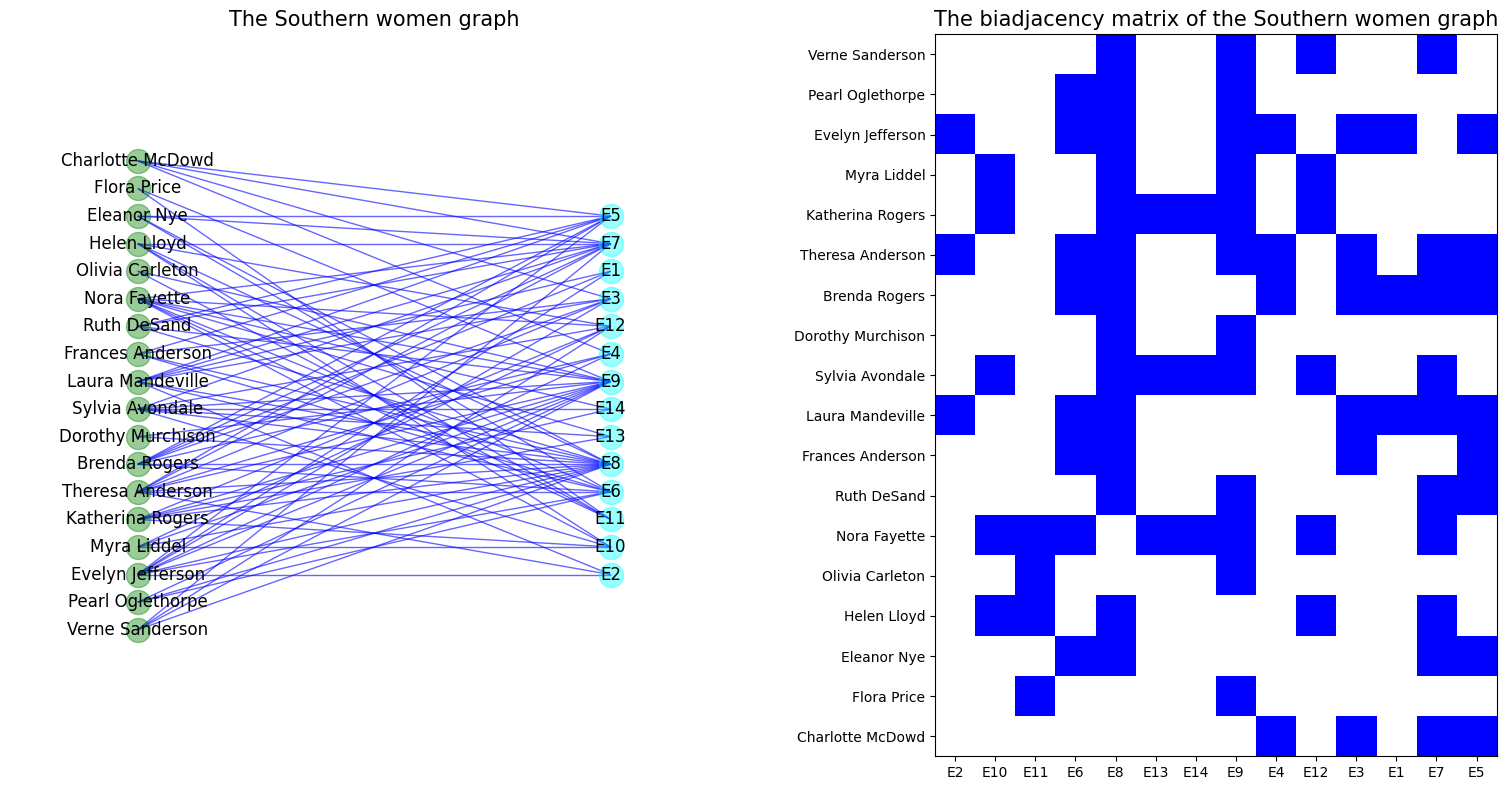

In [3]:
name = "Southern women"

G = nx.davis_southern_women_graph()
U, V = bipartite.sets(G)

edge_type(G,name)

pos = {}
for i, x in enumerate(U):
    pos[x] = (0, i)  # Left mode positions

# Calculate elevation for the right mode (Y)
y_elevation = (len(U)-len(V))/2
for j, y in enumerate(V):
    pos[y] = (1, j + y_elevation) 
    
plt.figure(figsize=(16,8))
plt.subplot(121)
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=list(U), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=list(V), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
B = biadjacency_matrix(G, row_order=U, column_order=V)
B_dense = B.todense()
x = V
y = U
plt.imshow(B_dense,cmap=matplotlib.colors.ListedColormap(['white', 'blue']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The biadjacency matrix of the "+name+" graph",fontsize=15);
plt.tight_layout()
plt.show()

<a id='1a'></a>
## <span style="color:green">1a. Binary Projections</span>

The Projection on Southern Women graph is an undirected graph.
The Projection on Southern Women graph has 18 nodes and 139 edges.
The nodes are:
 Brenda Rogers, Charlotte McDowd, Dorothy Murchison, Eleanor Nye, Evelyn Jefferson, Flora Price, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson.
This graph has no edge attributes.


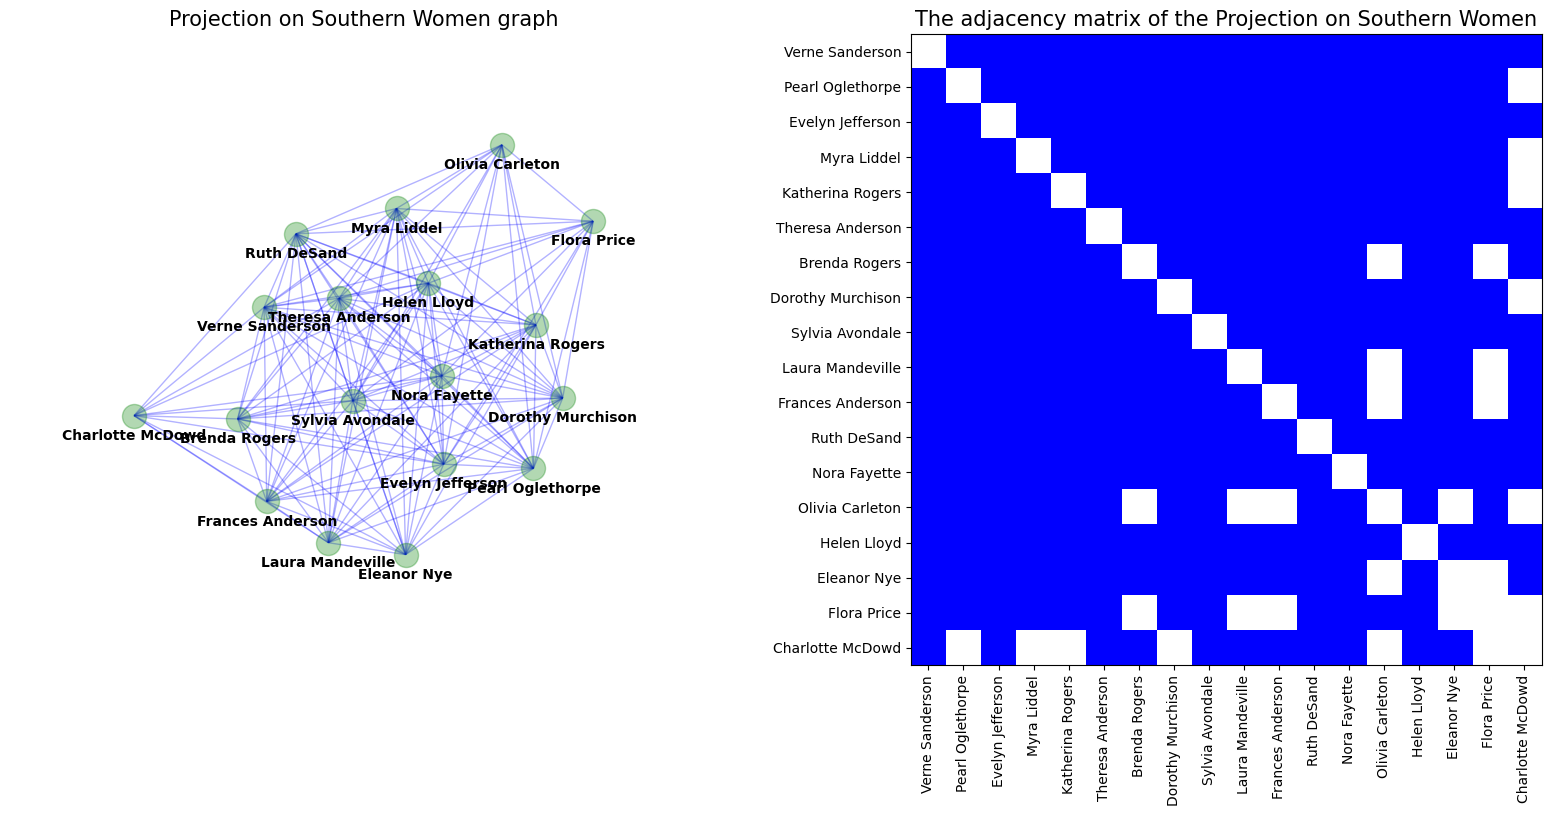

In [4]:
G1=bipartite.projected_graph(G, U)
name = "Projection on Southern Women"
edge_type(G1,name)

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G1, pos, edge_color="b", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=10, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G1)
x = list(G1.nodes())
y = list(G1.nodes())
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'blue']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=10, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The adjacency matrix of the "+name,fontsize=15);
plt.tight_layout()
plt.show()

The Projection on Events graph is an undirected graph.
The Projection on Events graph has 14 nodes and 66 edges.
The nodes are:
 E1, E10, E11, E12, E13, E14, E2, E3, E4, E5, E6, E7, E8, E9.
This graph has no edge attributes.


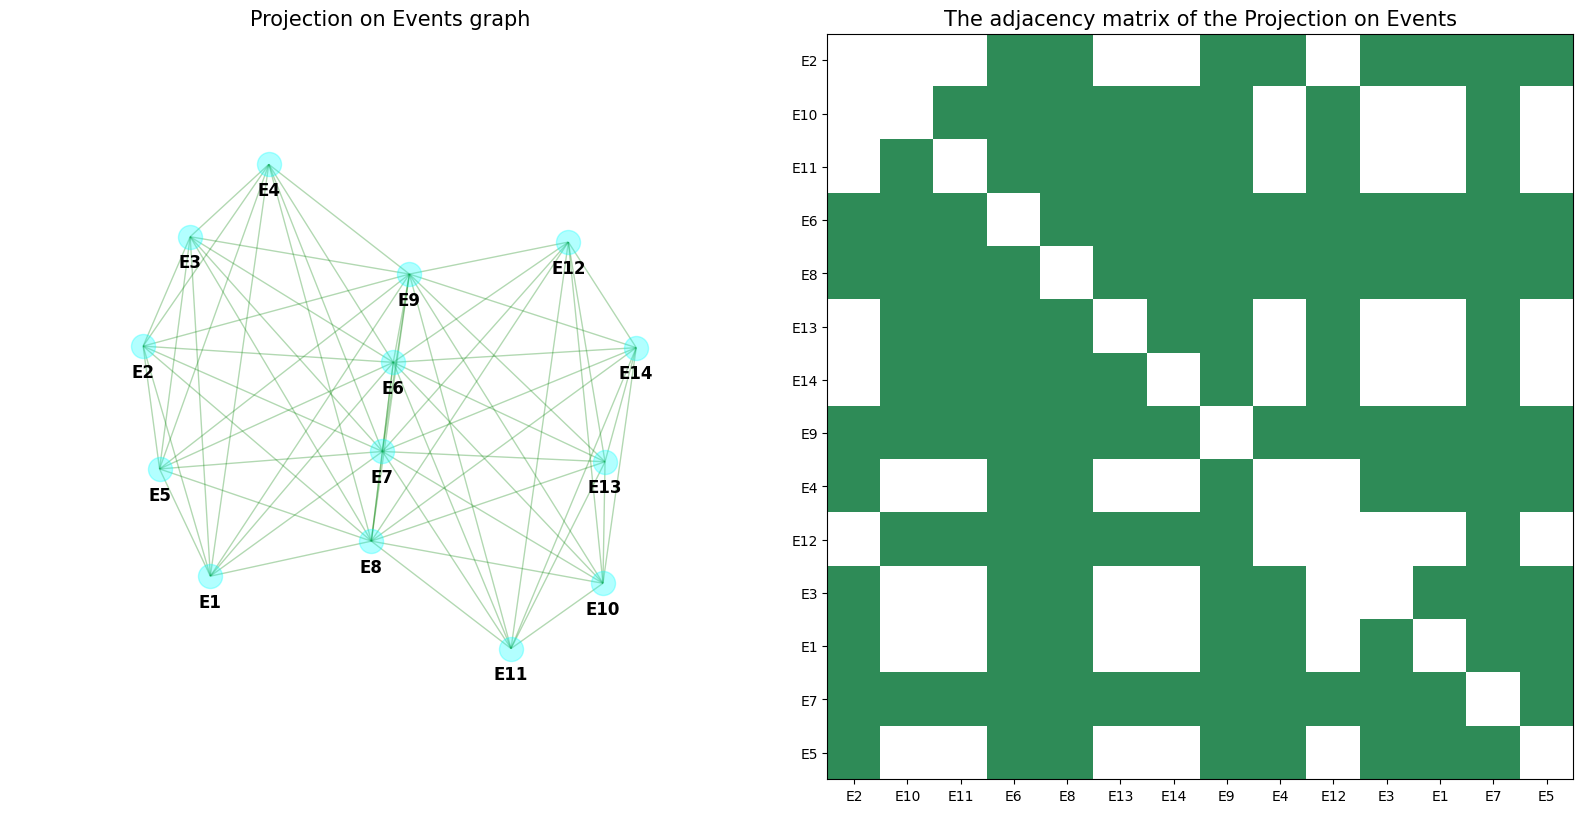

In [5]:
G2=bipartite.projected_graph(G, V)
name = "Projection on Events"
edge_type(G2,name)

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G2)
nodes = nx.draw_networkx_nodes(G2, pos, node_color="cyan", alpha=0.3)
nx.draw_networkx_edges(G2, pos, edge_color="g", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=12, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G2)
x = list(G2.nodes())
y = list(G2.nodes())
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The adjacency matrix of the "+name,fontsize=15);
plt.tight_layout()
plt.show()

<a id='1b'></a>
## <span style="color:green">1b. Weighted Projections</span>

The Weighted Projection on Southern Women graph is an undirected graph.
The Weighted Projection on Southern Women graph is a weighted graph.
The Weighted Projection on Southern Women graph has 18 nodes and 139 edges.
The nodes are:
 Brenda Rogers, Charlotte McDowd, Dorothy Murchison, Eleanor Nye, Evelyn Jefferson, Flora Price, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson.
Weighted graph with weight attribute 'weight'.


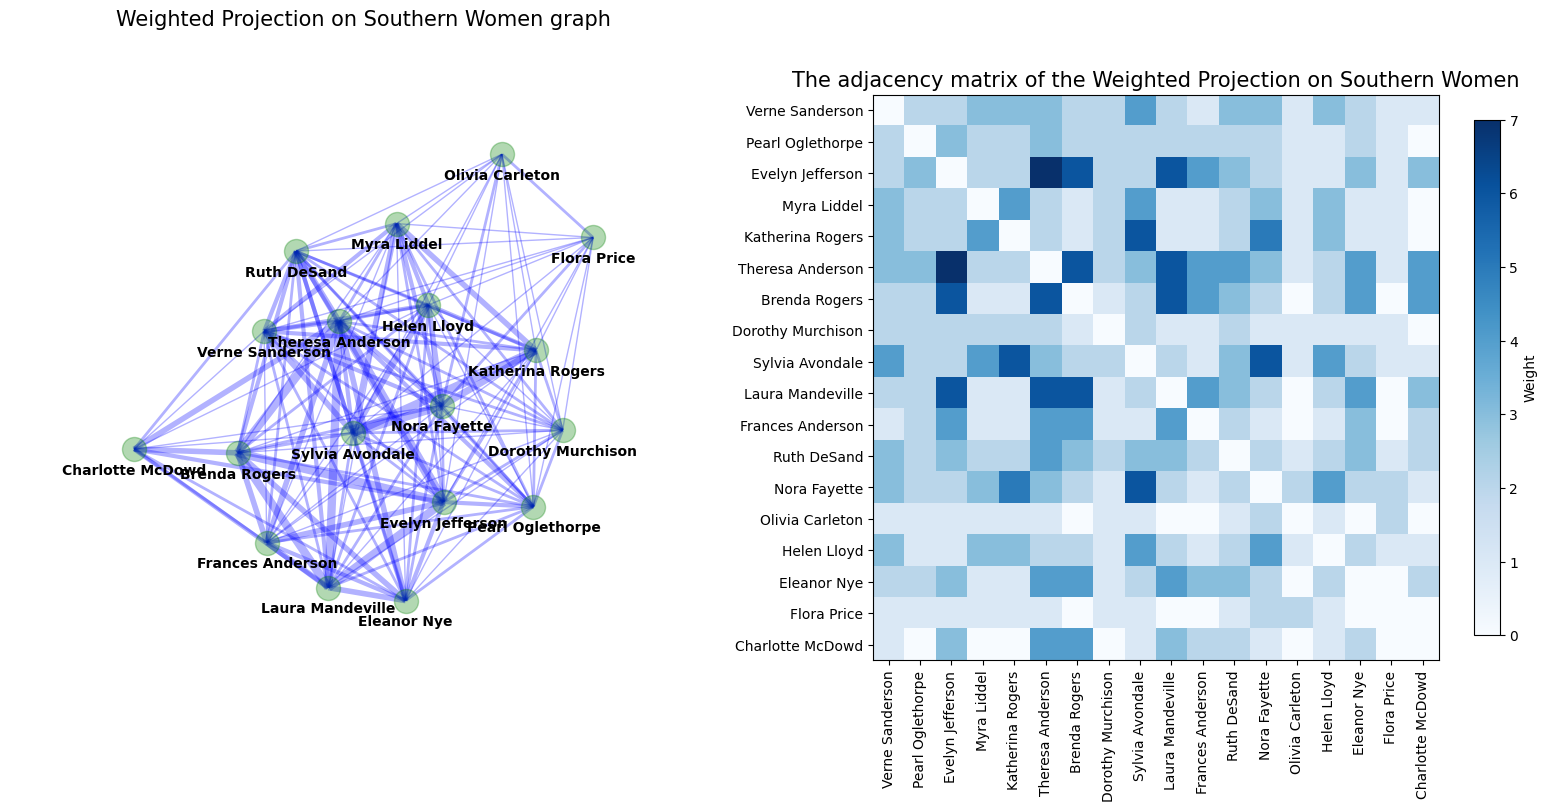

In [6]:
G1=bipartite.weighted_projected_graph(G, U)
name = "Weighted Projection on Southern Women"
edge_type(G1,name)
edge_width = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G1, pos, width=edge_width, edge_color="b", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=10, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G1)
cmap = plt.cm.Blues
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G1.nodes())
y = list(G1.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='vertical')
plt.yticks(range(len(y)), y, fontsize=10)
plt.title("The adjacency matrix of the " + name, fontsize=15)
plt.tight_layout()
plt.show()

The Weighted Projection on Events graph is an undirected graph.
The Weighted Projection on Events graph is a weighted graph.
The Weighted Projection on Events graph has 14 nodes and 66 edges.
The nodes are:
 E1, E10, E11, E12, E13, E14, E2, E3, E4, E5, E6, E7, E8, E9.
Weighted graph with weight attribute 'weight'.


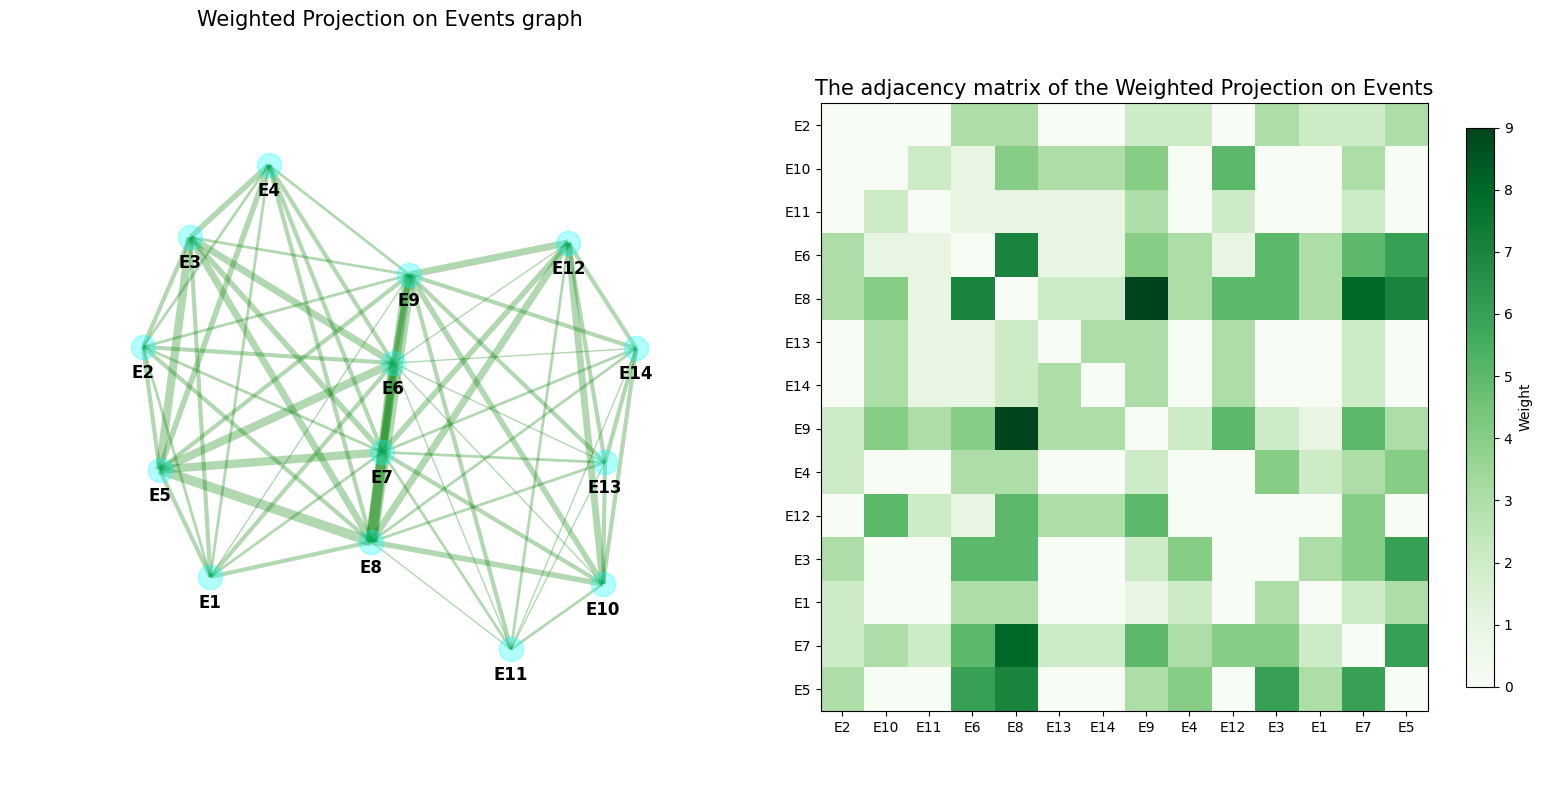

In [7]:
G2=bipartite.weighted_projected_graph(G, V)
name = "Weighted Projection on Events"
edge_type(G2,name)
edge_width = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G2)
nodes = nx.draw_networkx_nodes(G2, pos, node_color="cyan", alpha=0.3)
nx.draw_networkx_edges(G2, pos, width=edge_width, edge_color="g", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=12, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G2)
cmap = plt.cm.Greens
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G2.nodes())
y = list(G2.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal')
plt.yticks(range(len(y)), y, fontsize=10)
plt.title("The adjacency matrix of the " + name, fontsize=15)
plt.tight_layout()
plt.show()

<a id='1c'></a>
## <span style="color:green">1c. Newman's Weighted Projections</span>

The Newman's Weighted Projection on Southern Women graph is an undirected graph.
The Newman's Weighted Projection on Southern Women graph is a weighted graph.
The Newman's Weighted Projection on Southern Women graph has 18 nodes and 139 edges.
The nodes are:
 Brenda Rogers, Charlotte McDowd, Dorothy Murchison, Eleanor Nye, Evelyn Jefferson, Flora Price, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson.
Weighted graph with weight attribute 'weight'.


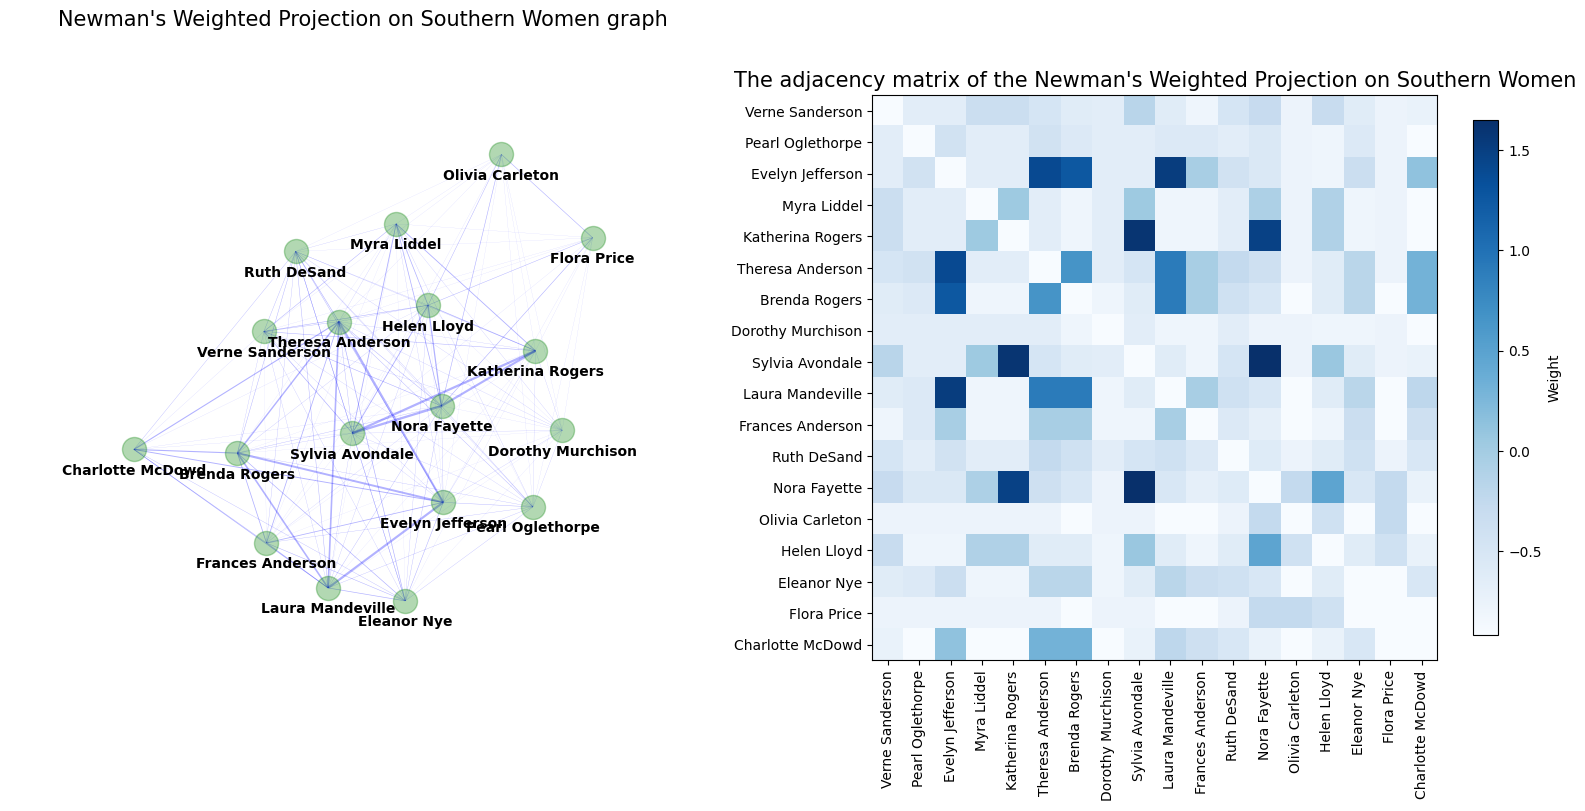

In [8]:
G1=bipartite.collaboration_weighted_projected_graph(G, U)
name = "Newman's Weighted Projection on Southern Women"
edge_type(G1,name)
edge_width = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G1, pos, width=edge_width, edge_color="b", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=10, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G1)
cmap = plt.cm.Blues
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G1.nodes())
y = list(G1.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='vertical')
plt.yticks(range(len(y)), y, fontsize=10)
plt.title("The adjacency matrix of the " + name, fontsize=15)
plt.tight_layout()
plt.show()

The Newman's Weighted Projection on Events graph is an undirected graph.
The Newman's Weighted Projection on Events graph is a weighted graph.
The Newman's Weighted Projection on Events graph has 14 nodes and 66 edges.
The nodes are:
 E1, E10, E11, E12, E13, E14, E2, E3, E4, E5, E6, E7, E8, E9.
Weighted graph with weight attribute 'weight'.


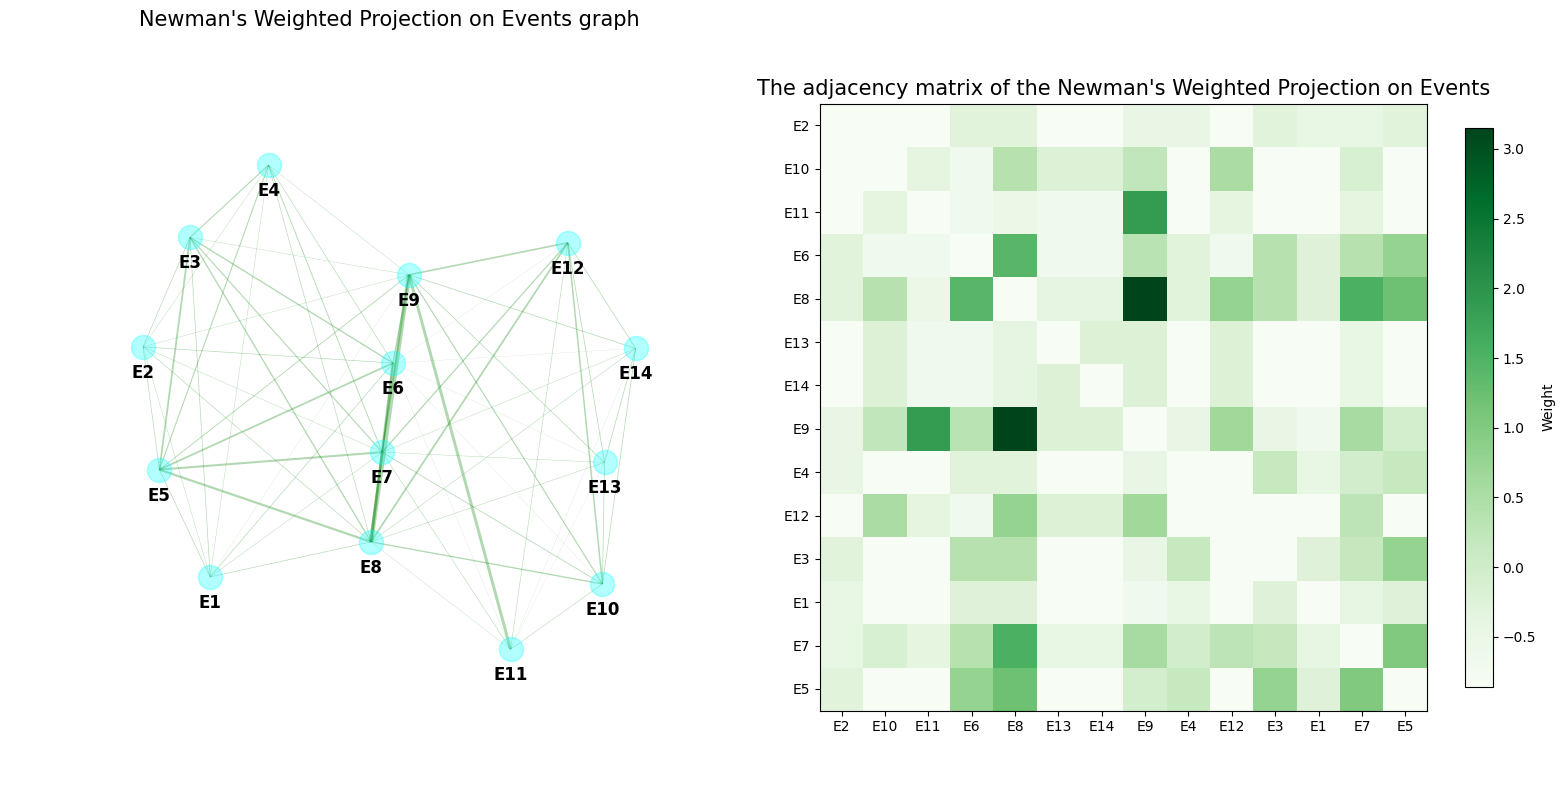

In [9]:
G2=bipartite.collaboration_weighted_projected_graph(G, V)
name = "Newman's Weighted Projection on Events"
edge_type(G2,name)
edge_width = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G2)
nodes = nx.draw_networkx_nodes(G2, pos, node_color="cyan", alpha=0.3)
nx.draw_networkx_edges(G2, pos, width=edge_width, edge_color="g", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=12, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G2)
cmap = plt.cm.Greens
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G2.nodes())
y = list(G2.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal')
plt.yticks(range(len(y)), y, fontsize=10)
plt.title("The adjacency matrix of the " + name, fontsize=15)
plt.tight_layout()
plt.show()

<a id='1d'></a>
## <span style="color:green">1d. Overlap Weighted Projections</span>

The Overlap Weighted Projection on Southern Women graph is an undirected graph.
The Overlap Weighted Projection on Southern Women graph is a weighted graph.
The Overlap Weighted Projection on Southern Women graph has 18 nodes and 139 edges.
The nodes are:
 Brenda Rogers, Charlotte McDowd, Dorothy Murchison, Eleanor Nye, Evelyn Jefferson, Flora Price, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson.
Weighted graph with weight attribute 'weight'.


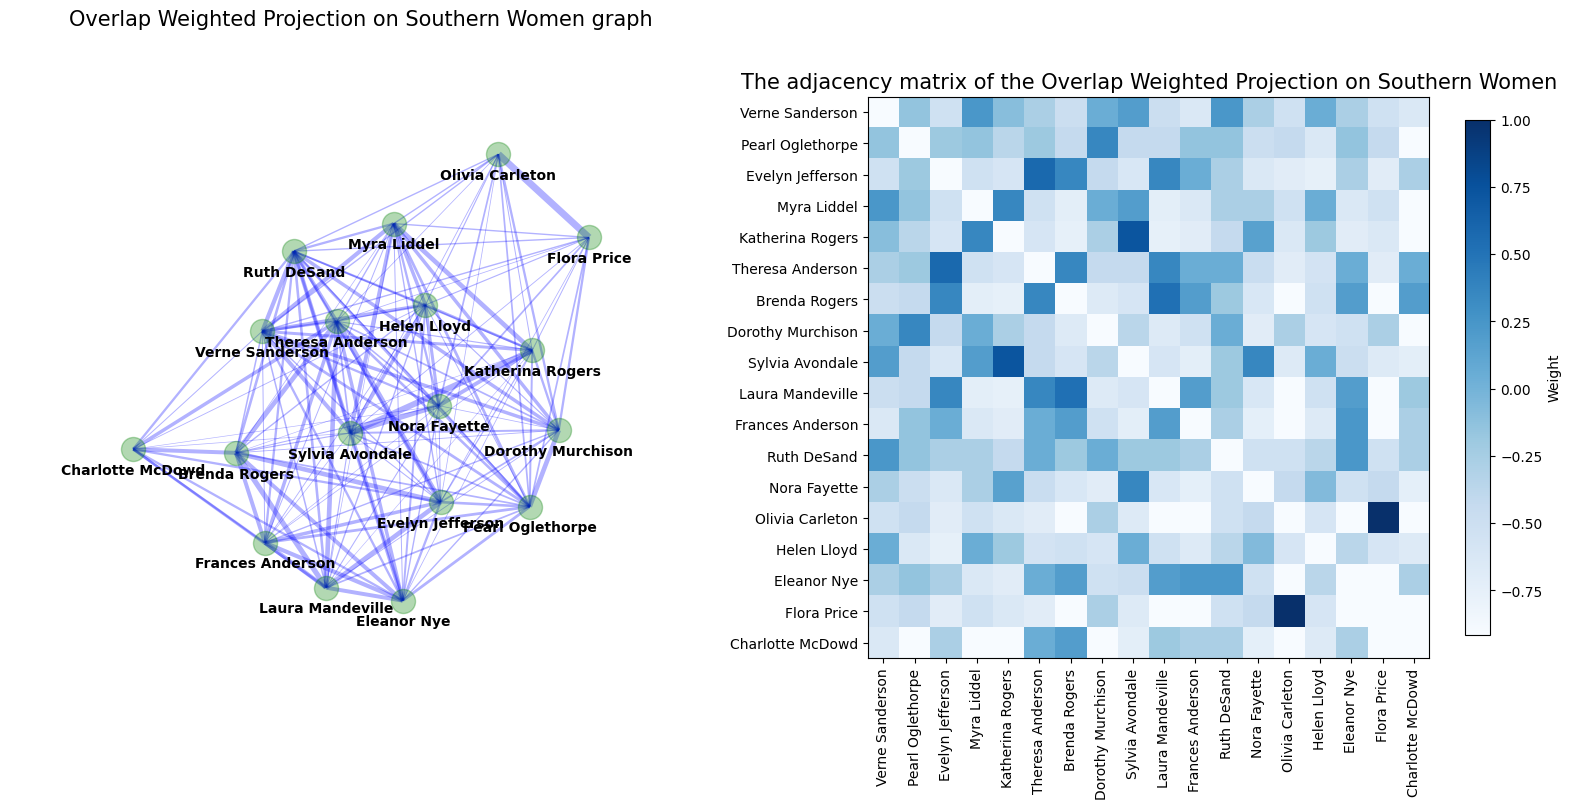

In [10]:
G1=bipartite.overlap_weighted_projected_graph(G, U)
name = "Overlap Weighted Projection on Southern Women"
edge_type(G1,name)
edge_width = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G1, pos, width=[5*e for e in edge_width], edge_color="b", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=10, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G1)
cmap = plt.cm.Blues
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G1.nodes())
y = list(G1.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='vertical')
plt.yticks(range(len(y)), y, fontsize=10)
plt.title("The adjacency matrix of the " + name, fontsize=15)
plt.tight_layout()
plt.show()

The Overlap Weighted Projection on Events graph is an undirected graph.
The Overlap Weighted Projection on Events graph is a weighted graph.
The Overlap Weighted Projection on Events graph has 14 nodes and 66 edges.
The nodes are:
 E1, E10, E11, E12, E13, E14, E2, E3, E4, E5, E6, E7, E8, E9.
Weighted graph with weight attribute 'weight'.


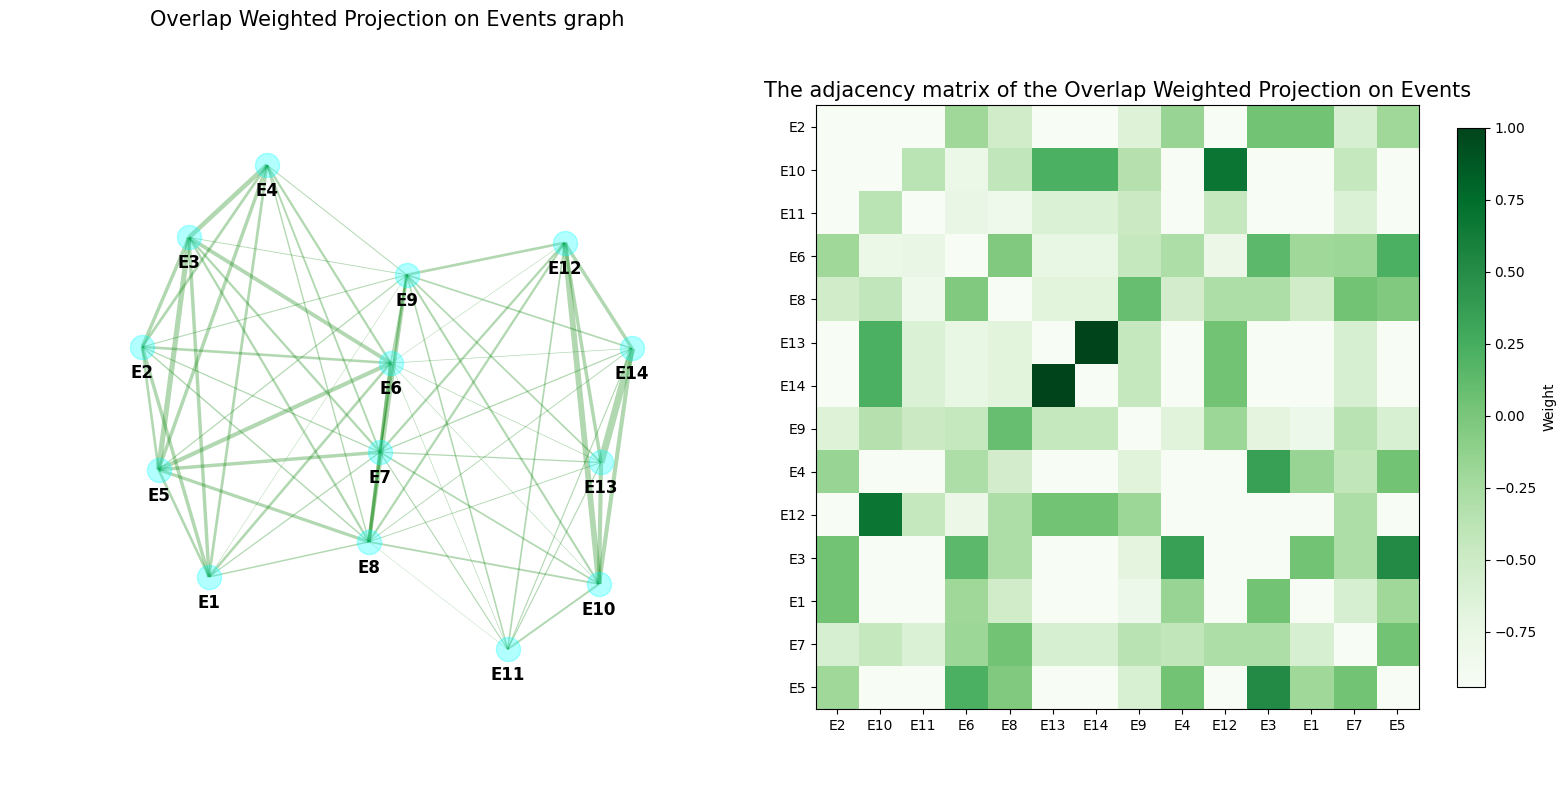

In [11]:
G2=bipartite.overlap_weighted_projected_graph(G, V)
name = "Overlap Weighted Projection on Events"
edge_type(G2,name)
edge_width = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G2)
nodes = nx.draw_networkx_nodes(G2, pos, node_color="cyan", alpha=0.3)
nx.draw_networkx_edges(G2, pos, width=[5*e for e in edge_width], edge_color="g", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=12, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G2)
cmap = plt.cm.Greens
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G2.nodes())
y = list(G2.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal')
plt.yticks(range(len(y)), y, fontsize=10)
plt.title("The adjacency matrix of the " + name, fontsize=15)
plt.tight_layout()
plt.show()

<a id='2'></a>
## <span style="color:green">2. A Random Weighted Bipartite Graph</span>

The random weighted bipartite graph is an undirected graph.
The random weighted bipartite is a bipartite graph.
The random weighted bipartite graph is a weighted graph.
The random weighted bipartite graph has 35 nodes and len(edges) edges.
19 nodes are in the first set of the bipartition:
 ['x0', 'x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x9'].
16 nodes are in the second set of the bipartition:
 ['y0', 'y1', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9'].
Weighted graph with weight attribute 'weight'.


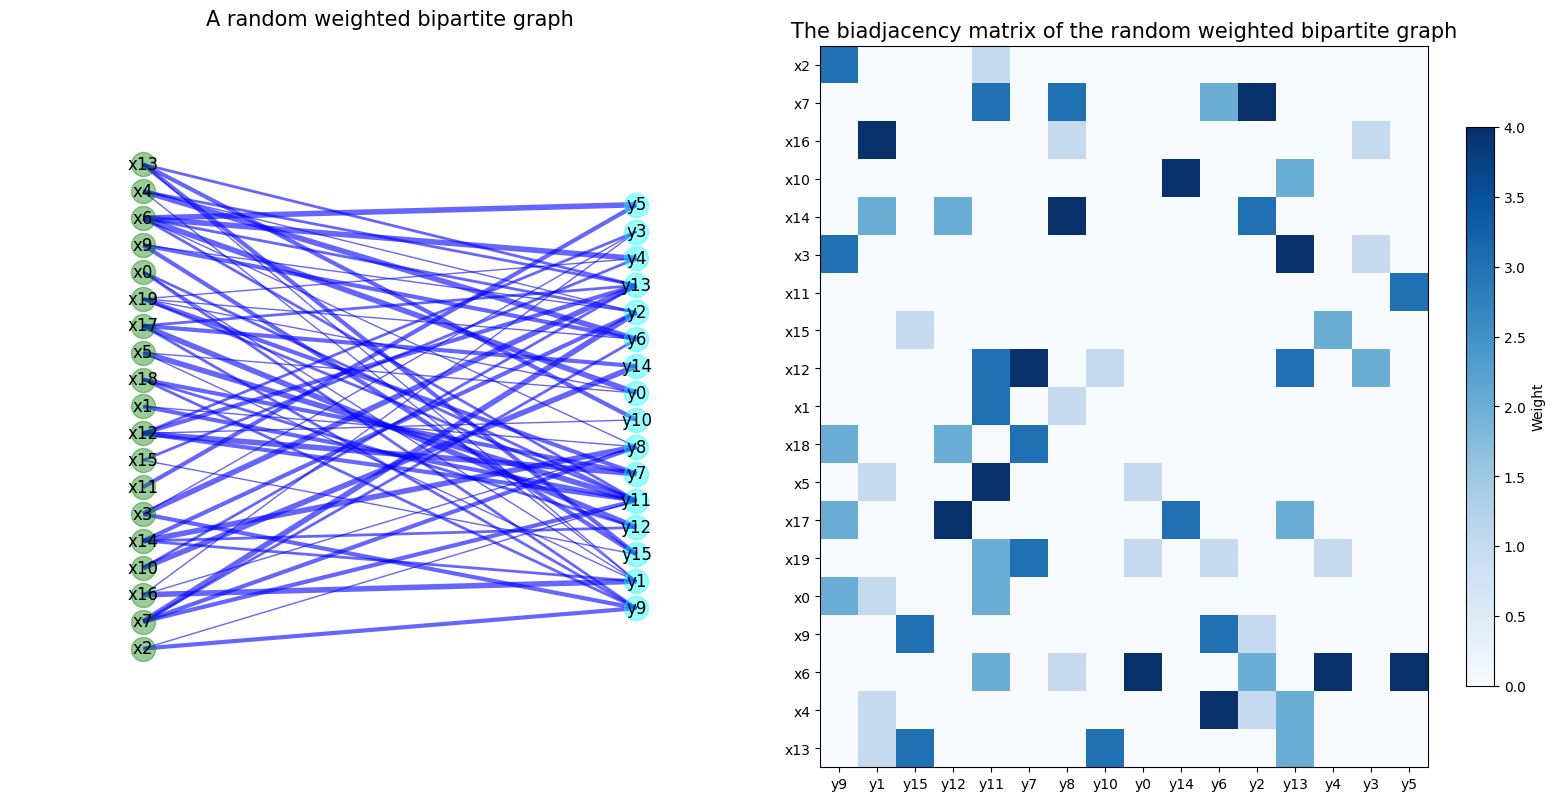

In [12]:
name = "random weighted bipartite"

while True:
    G = nx.Graph()
    X0 = ["x"+str(i) for i in range(20)]
    Y0 = ["y"+str(i) for i in range(16)]
    X0Y0 = [(x,y) for x in X0 for y in Y0]
    p = random.uniform(0.1,0.2)   # probability of edge occurrence
    E = random.sample(X0Y0,int(p*len(X0Y0)))
    maxw=5
    w_edges=[]
    for edge in E:
        ed=edge[0]
        de=edge[1]
        wei=random.randrange(1,maxw)
        w_edges.append((ed,de,wei))
    G.add_weighted_edges_from(w_edges)
    if nx.is_connected(G):
        break
U, V = bipartite.sets(G)
edge_width = [data.get('weight', 1) for _, _, data in G.edges(data=True)]
edge_type(G,name)

pos = {}
for i, x in enumerate(U):
    pos[x] = (0, i)  # Left mode positions

# Calculate elevation for the right mode (Y)
y_elevation = (len(U)-len(V))/2
for j, y in enumerate(V):
    pos[y] = (1, j + y_elevation) 
    
plt.figure(figsize=(16,8))
plt.subplot(121)
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=list(U), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=list(V), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
B = biadjacency_matrix(G, row_order=U, column_order=V)
B_dense = B.todense()
cmap = plt.cm.Blues
vmin = min(edge_width) - 1
vmax = max(edge_width)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = V
y = U
plt.imshow(B_dense,cmap=cmap,interpolation="none")
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The biadjacency matrix of the "+name+" graph",fontsize=15);
plt.tight_layout()
plt.show()

<a id='2a'></a>
## <span style="color:green">2a. Binary Projections</span>

The Projection on U graph is an undirected graph.
The Projection on U graph has 19 nodes and 90 edges.
The nodes are:
 x0, x1, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x2, x3, x4, x5, x6, x7, x9.
This graph has no edge attributes.


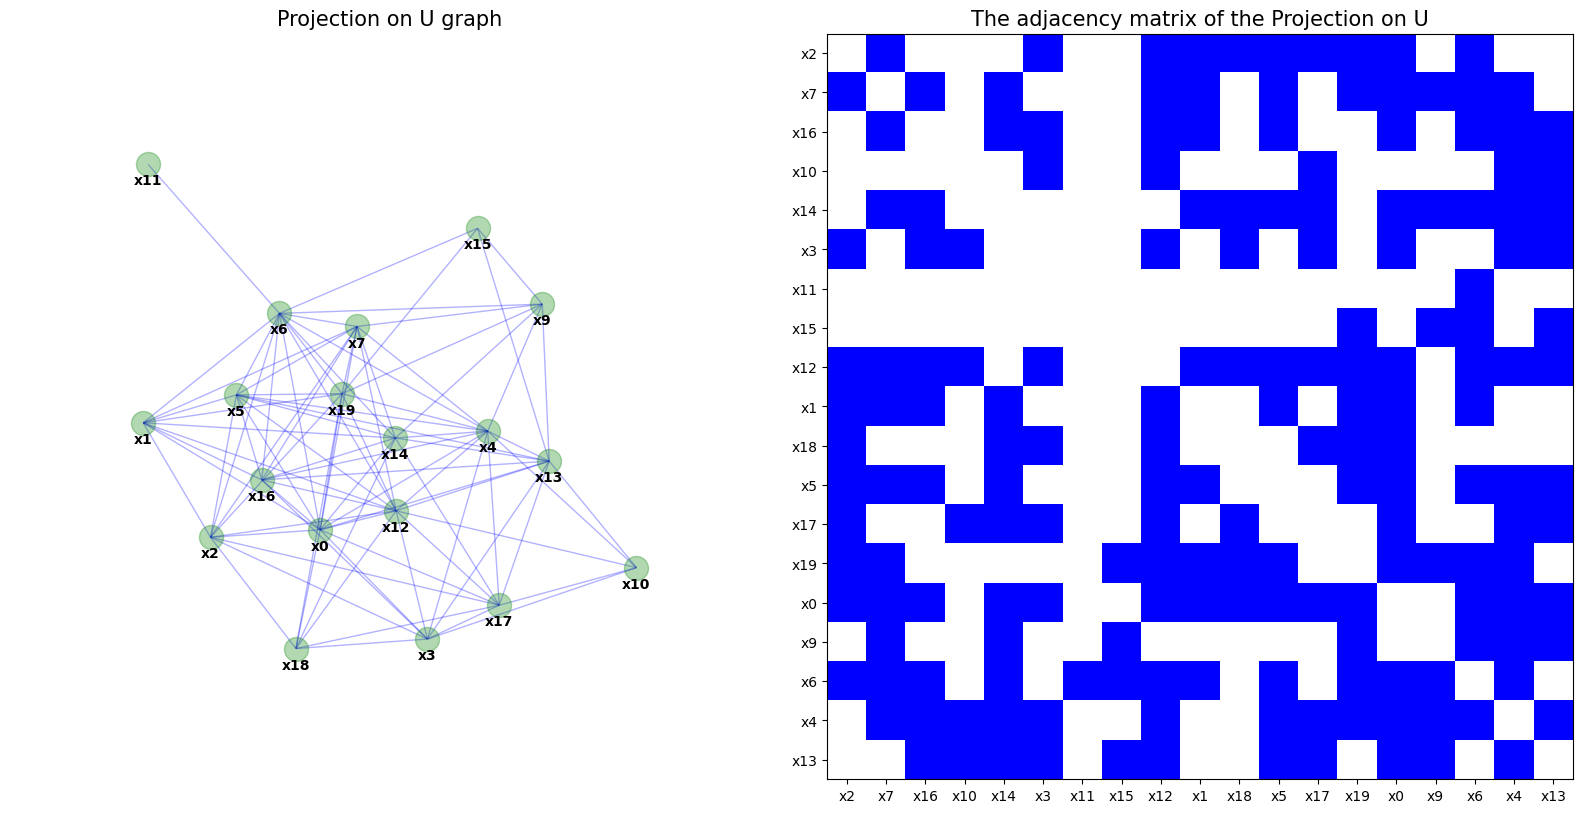

In [13]:
G1=bipartite.projected_graph(G, U)
name = "Projection on U"
edge_type(G1,name)

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G1, pos, edge_color="b", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=10, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G1)
x = list(G1.nodes())
y = list(G1.nodes())
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'blue']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The adjacency matrix of the "+name,fontsize=15);
plt.tight_layout()
plt.show()

The Projection on V graph is an undirected graph.
The Projection on V graph has 16 nodes and 64 edges.
The nodes are:
 y0, y1, y10, y11, y12, y13, y14, y15, y2, y3, y4, y5, y6, y7, y8, y9.
This graph has no edge attributes.


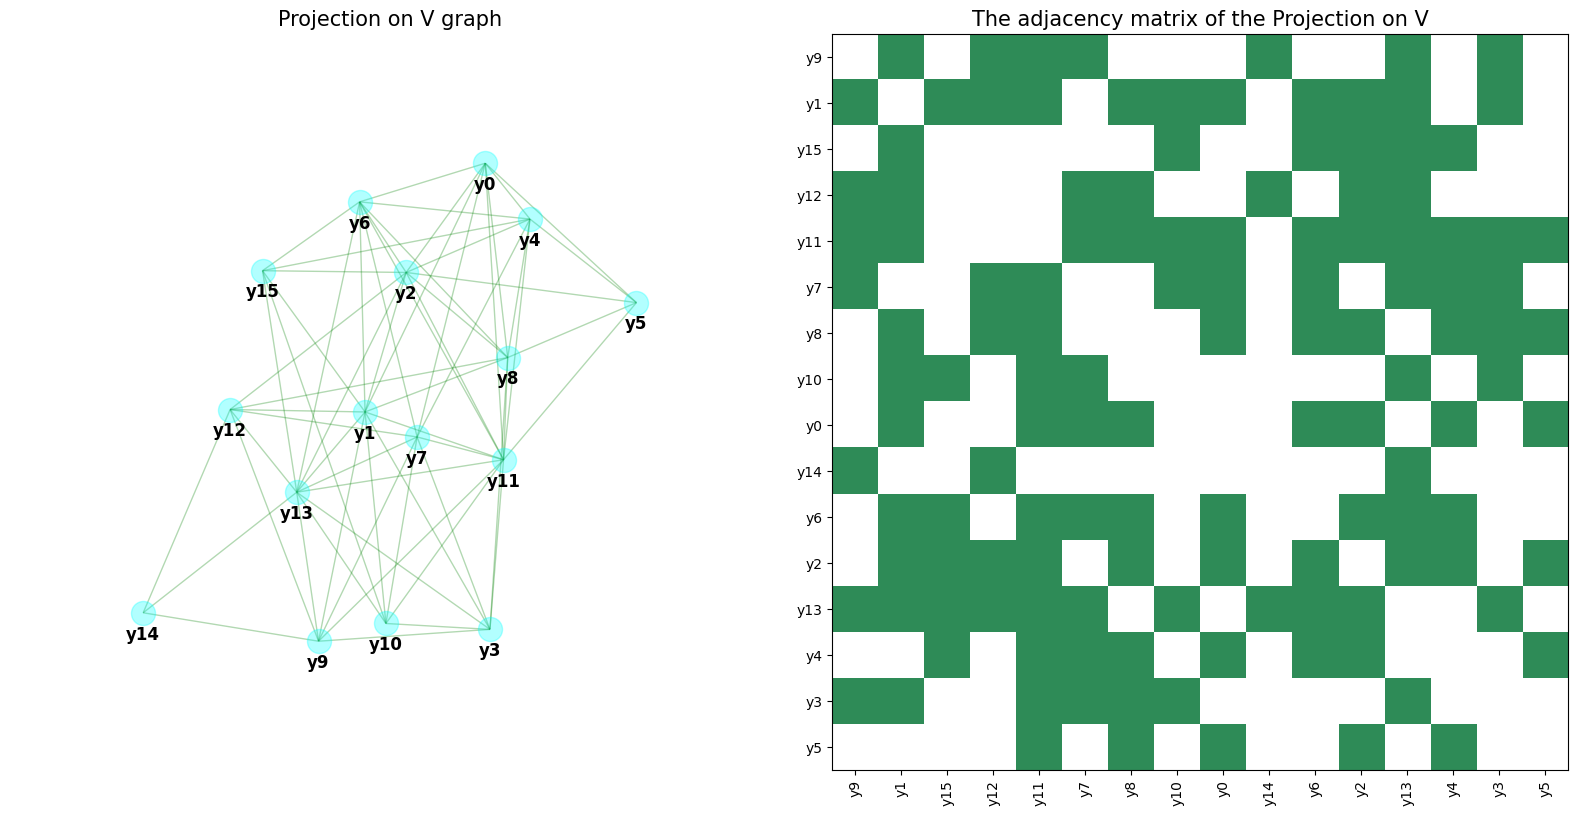

In [14]:
G2=bipartite.projected_graph(G, V)
name = "Projection on V"
edge_type(G2,name)

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G2)
nodes = nx.draw_networkx_nodes(G2, pos, node_color="cyan", alpha=0.3)
nx.draw_networkx_edges(G2, pos, edge_color="g", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=12, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G2)
x = list(G2.nodes())
y = list(G2.nodes())
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=10, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The adjacency matrix of the "+name,fontsize=15);
plt.tight_layout()
plt.show()

<a id='2b'></a>
## <span style="color:green">2b. Weighted Projections</span>

The Weighted Projection on U graph is an undirected graph.
The Weighted Projection on U graph is a weighted graph.
The Weighted Projection on U graph has 19 nodes and 90 edges.
The nodes are:
 x0, x1, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x2, x3, x4, x5, x6, x7, x9.
Weighted graph with weight attribute 'weight'.


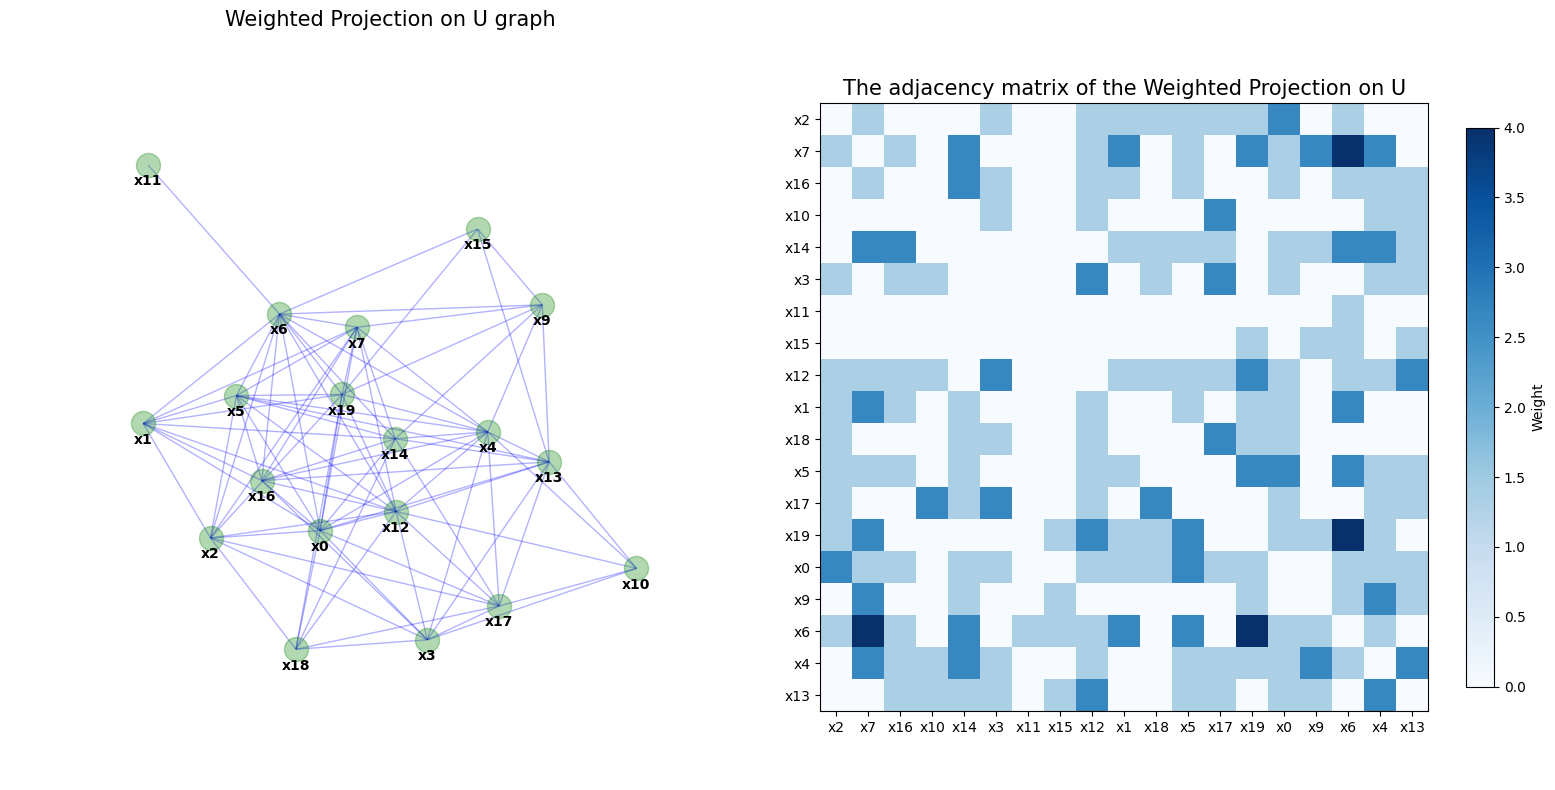

In [15]:
G1=bipartite.weighted_projected_graph(G, U)
name = "Weighted Projection on U"
edge_type(G1,name)

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G1, pos, edge_color="b", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=10, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G1)
cmap = plt.cm.Blues
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G1.nodes())
y = list(G1.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='horizontal');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The adjacency matrix of the "+name,fontsize=15);
plt.tight_layout()
plt.show()

The Weighted Projection on V graph is an undirected graph.
The Weighted Projection on V graph has 16 nodes and 64 edges.
The nodes are:
 y0, y1, y10, y11, y12, y13, y14, y15, y2, y3, y4, y5, y6, y7, y8, y9.
This graph has no edge attributes.


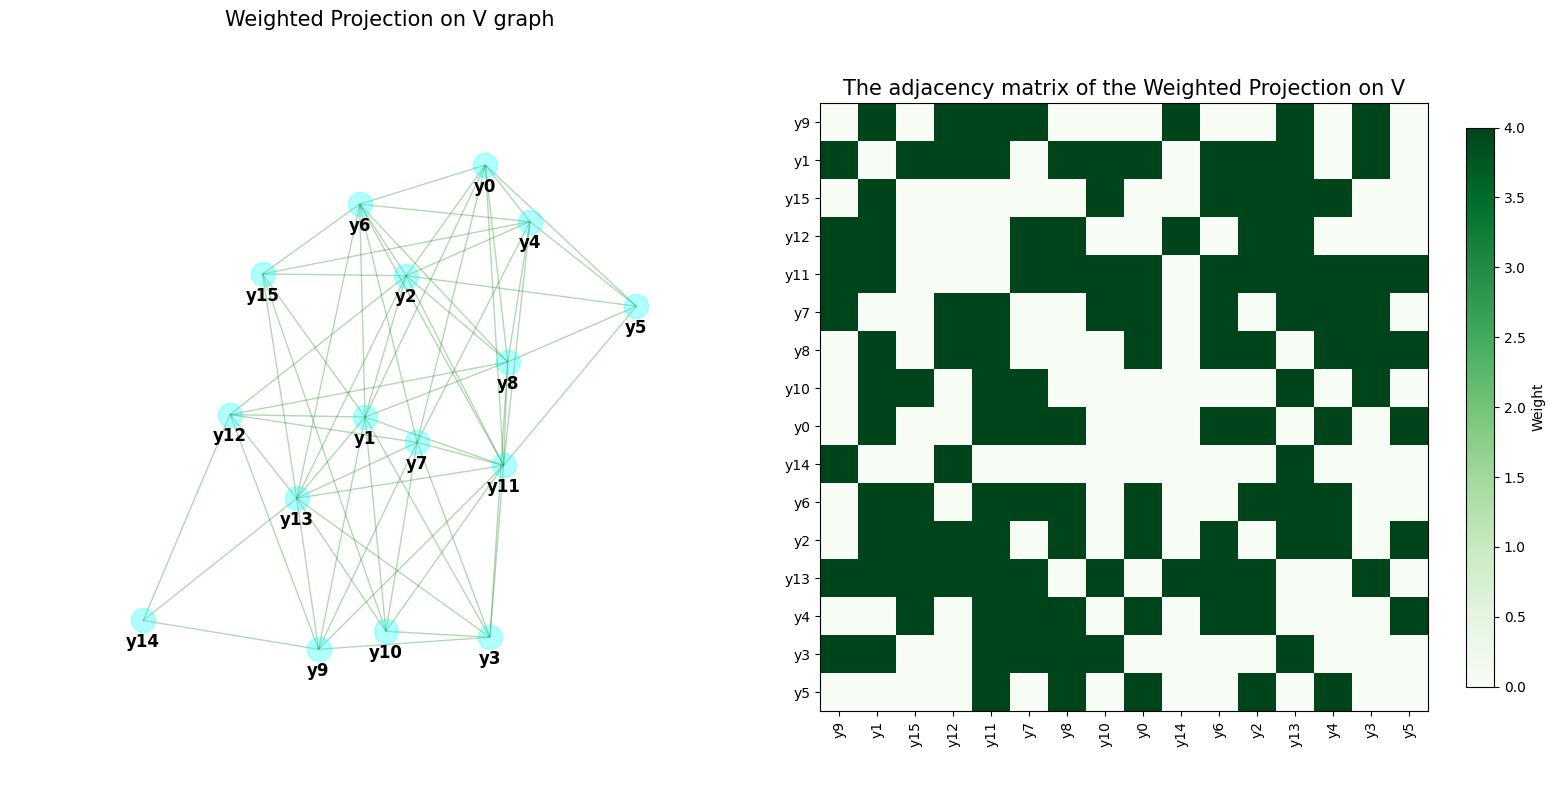

In [16]:
G2=bipartite.projected_graph(G, V)
name = "Weighted Projection on V"
edge_type(G2,name)

plt.figure(figsize=(16,8))
plt.subplot(121)
pos=graphviz_layout(G2)
nodes = nx.draw_networkx_nodes(G2, pos, node_color="cyan", alpha=0.3)
nx.draw_networkx_edges(G2, pos, edge_color="g", alpha=0.3)
offset = 4  
for node, (x, y) in pos.items():
    plt.text(x, y - offset, str(node), fontsize=12, ha='center', va='top', fontweight='bold')
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G2)
cmap = plt.cm.Greens
vmin = min(edge_width) - 1
vmax = max(edge_width)
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Weight", shrink=0.75)
x = list(G2.nodes())
y = list(G2.nodes())
plt.xticks(range(len(x)), x, fontsize=10, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=10);
plt.title("The adjacency matrix of the "+name,fontsize=15);
plt.tight_layout()
plt.show()